In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-7c4b0fe5-60ed-ece0-2814-c1d0082c1e07)


In [ ]:
!git clone https://github.com/openai/CLIP
!pip uninstall taming-transformers
!git clone https://github.com/CompVis/taming-transformers.git
!pip install ftfy regex tqdm omegaconf pytorch-lightning
!pip install kornia
!pip install imageio-ffmpeg   
!pip install einops          
!mkdir steps

%cd /content/drive/Othercomputers/HomePC/Neurophysiological-Data-Decoding/ 

Cloning into 'CLIP'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 185 (delta 7), reused 14 (delta 4), pack-reused 168
Receiving objects: 100% (185/185), 8.90 MiB | 21.16 MiB/s, done.
Resolving deltas: 100% (87/87), done.
Cloning into 'taming-transformers'...
remote: Enumerating objects: 1297, done.
remote: Counting objects: 100% (487/487), done.
remote: Compressing objects: 100% (466/466), done.
remote: Total 1297 (delta 32), reused 459 (delta 19), pack-reused 810
Receiving objects: 100% (1297/1297), 409.22 MiB | 38.29 MiB/s, done.
Resolving deltas: 100% (241/241), done.
     |████████████████████████████████| 64 kB 1.9 MB/s 
     |████████████████████████████████| 74 kB 3.1 MB/s 
     |████████████████████████████████| 526 kB 18.1 MB/s 
     |████████████████████████████████| 596 kB 30.7 MB/s 
     |████████████████████████████████| 112 kB 51.9 MB/s 
     |████████████████████████

     |████████████████████████████████| 401 kB 5.3 MB/s 
     |████████████████████████████████| 26.9 MB 1.5 MB/s 
/content/drive/Othercomputers/HomePC/Neurophysiological-Data-Decoding


In [ ]:
#@markdown #**Selection of models to download**
#@markdown ---
#@markdown **By default, the notebook downloads the 1024 and 16384 models from ImageNet. There are others like COCO-Stuff, WikiArt 1024, WikiArt 16384, FacesHQ or S-FLCKR, which are heavy, and if you are not going to use them it would be pointless to download them, so if you want to use them, simply select the models to download.**

#@markdown ---

imagenet_1024 = True #@param {type:"boolean"}
imagenet_16384 = True #@param {type:"boolean"}
coco = False #@param {type:"boolean"}
faceshq = False #@param {type:"boolean"}
wikiart_1024 = False #@param {type:"boolean"}
wikiart_16384 = False #@param {type:"boolean"}
sflckr = False #@param {type:"boolean"}
openimages_8192 = True #@param {type:"boolean"}

if imagenet_1024:
  !curl -L -o vqgan_imagenet_f16_1024.yaml -C - 'https://heibox.uni-heidelberg.de/d/8088892a516d4e3baf92/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' #ImageNet 1024
  !curl -L -o vqgan_imagenet_f16_1024.ckpt -C - 'https://heibox.uni-heidelberg.de/d/8088892a516d4e3baf92/files/?p=%2Fckpts%2Flast.ckpt&dl=1'  #ImageNet 1024
if imagenet_16384:
  !curl -L -o vqgan_imagenet_f16_16384.yaml -C - 'https://heibox.uni-heidelberg.de/d/a7530b09fed84f80a887/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' #ImageNet 16384
  !curl -L -o vqgan_imagenet_f16_16384.ckpt -C - 'https://heibox.uni-heidelberg.de/d/a7530b09fed84f80a887/files/?p=%2Fckpts%2Flast.ckpt&dl=1' #ImageNet 16384
if openimages_8192:
  !curl -L -o vqgan_openimages_f16_8192.yaml -C - 'https://heibox.uni-heidelberg.de/d/2e5662443a6b4307b470/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' #ImageNet 16384
  !curl -L -o vqgan_openimages_f16_8192.ckpt -C - 'https://heibox.uni-heidelberg.de/d/2e5662443a6b4307b470/files/?p=%2Fckpts%2Flast.ckpt&dl=1' #ImageNet 16384

if coco:
  !curl -L -o coco.yaml -C - 'https://dl.nmkd.de/ai/clip/coco/coco.yaml' #COCO
  !curl -L -o coco.ckpt -C - 'https://dl.nmkd.de/ai/clip/coco/coco.ckpt' #COCO
if faceshq:
  !curl -L -o faceshq.yaml -C - 'https://drive.google.com/uc?export=download&id=1fHwGx_hnBtC8nsq7hesJvs-Klv-P0gzT' #FacesHQ
  !curl -L -o faceshq.ckpt -C - 'https://app.koofr.net/content/links/a04deec9-0c59-4673-8b37-3d696fe63a5d/files/get/last.ckpt?path=%2F2020-11-13T21-41-45_faceshq_transformer%2Fcheckpoints%2Flast.ckpt' #FacesHQ
if wikiart_1024: 
  !curl -L -o wikiart_1024.yaml -C - 'http://mirror.io.community/blob/vqgan/wikiart.yaml' #WikiArt 1024
  !curl -L -o wikiart_1024.ckpt -C - 'http://mirror.io.community/blob/vqgan/wikiart.ckpt' #WikiArt 1024
if wikiart_16384: 
  !curl -L -o wikiart_16384.yaml -C - 'http://mirror.io.community/blob/vqgan/wikiart_16384.yaml' #WikiArt 16384
  !curl -L -o wikiart_16384.ckpt -C - 'http://mirror.io.community/blob/vqgan/wikiart_16384.ckpt' #WikiArt 16384
if sflckr:
  !curl -L -o sflckr.yaml -C - 'https://heibox.uni-heidelberg.de/d/73487ab6e5314cb5adba/files/?p=%2Fconfigs%2F2020-11-09T13-31-51-project.yaml&dl=1' #S-FLCKR
  !curl -L -o sflckr.ckpt -C - 'https://heibox.uni-heidelberg.de/d/73487ab6e5314cb5adba/files/?p=%2Fcheckpoints%2Flast.ckpt&dl=1' #S-FLCKR

** Resuming transfer from byte position 645
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
** Resuming transfer from byte position 957954257
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
** Resuming transfer from byte position 692
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--

In [ ]:
#@markdown #**Loading libraries and definitions**

import argparse
import math
from pathlib import Path
import sys

sys.path.insert(1, '/content/taming-transformers')
from IPython import display
from base64 import b64encode
from omegaconf import OmegaConf
from PIL import Image
from taming.models import cond_transformer, vqgan
import taming.modules 
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import transforms
from torchvision.transforms import functional as TF
from tqdm.notebook import tqdm

from CLIP import clip
import kornia.augmentation as K
import numpy as np
import imageio
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True


def sinc(x):
    return torch.where(x != 0, torch.sin(math.pi * x) / (math.pi * x), x.new_ones([]))


def lanczos(x, a):
    cond = torch.logical_and(-a < x, x < a)
    out = torch.where(cond, sinc(x) * sinc(x/a), x.new_zeros([]))
    return out / out.sum()


def ramp(ratio, width):
    n = math.ceil(width / ratio + 1)
    out = torch.empty([n])
    cur = 0
    for i in range(out.shape[0]):
        out[i] = cur
        cur += ratio
    return torch.cat([-out[1:].flip([0]), out])[1:-1]


def resample(input, size, align_corners=True):
    n, c, h, w = input.shape
    dh, dw = size

    input = input.view([n * c, 1, h, w])

    if dh < h:
        kernel_h = lanczos(ramp(dh / h, 2), 2).to(input.device, input.dtype)
        pad_h = (kernel_h.shape[0] - 1) // 2
        input = F.pad(input, (0, 0, pad_h, pad_h), 'reflect')
        input = F.conv2d(input, kernel_h[None, None, :, None])

    if dw < w:
        kernel_w = lanczos(ramp(dw / w, 2), 2).to(input.device, input.dtype)
        pad_w = (kernel_w.shape[0] - 1) // 2
        input = F.pad(input, (pad_w, pad_w, 0, 0), 'reflect')
        input = F.conv2d(input, kernel_w[None, None, None, :])

    input = input.view([n, c, h, w])
    return F.interpolate(input, size, mode='bicubic', align_corners=align_corners)


class ReplaceGrad(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x_forward, x_backward):
        ctx.shape = x_backward.shape
        return x_forward

    @staticmethod
    def backward(ctx, grad_in):
        return None, grad_in.sum_to_size(ctx.shape)


replace_grad = ReplaceGrad.apply


class ClampWithGrad(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, min, max):
        ctx.min = min
        ctx.max = max
        ctx.save_for_backward(input)
        return input.clamp(min, max)

    @staticmethod
    def backward(ctx, grad_in):
        input, = ctx.saved_tensors
        return grad_in * (grad_in * (input - input.clamp(ctx.min, ctx.max)) >= 0), None, None


clamp_with_grad = ClampWithGrad.apply


def vector_quantize(x, codebook):
    d = x.pow(2).sum(dim=-1, keepdim=True) + codebook.pow(2).sum(dim=1) - 2 * x @ codebook.T
    indices = d.argmin(-1)
    x_q = F.one_hot(indices, codebook.shape[0]).to(d.dtype) @ codebook
    return replace_grad(x_q, x)

def load_vqgan_model(config_path, checkpoint_path):
    config = OmegaConf.load(config_path)
    if config.model.target == 'taming.models.vqgan.VQModel':
        model = vqgan.VQModel(**config.model.params)
        model.eval().requires_grad_(False)
        model.init_from_ckpt(checkpoint_path)
    elif config.model.target == 'taming.models.vqgan.GumbelVQ':
        model = vqgan.GumbelVQ(**config.model.params)
        model.eval().requires_grad_(False)
        model.init_from_ckpt(checkpoint_path)
    elif config.model.target == 'taming.models.cond_transformer.Net2NetTransformer':
        parent_model = cond_transformer.Net2NetTransformer(**config.model.params)
        parent_model.eval().requires_grad_(False)
        parent_model.init_from_ckpt(checkpoint_path)
        model = parent_model.first_stage_model
    else:
        raise ValueError(f'unknown model type: {config.model.target}')
    del model.loss
    return model


def resize_image(image, out_size):
    ratio = image.size[0] / image.size[1]
    area = min(image.size[0] * image.size[1], out_size[0] * out_size[1])
    size = round((area * ratio)**0.5), round((area / ratio)**0.5)
    return image.resize(size, Image.LANCZOS)

`input_normed.sub(embed_normed).norm(dim=2).div(2).arcsin().pow(2).mul(2)`  

$2\cdot\arcsin^2({\frac{1}{2} \cdot \lVert u - v \rVert})$

In [ ]:
#@markdown #**Parameters**
#@markdown ---

width =  224#@param {type:"number"}
height = 224#@param {type:"number"}
model = "vqgan_imagenet_f16_1024" #@param ["vqgan_imagenet_f16_16384", "vqgan_imagenet_f16_1024", "vqgan_openimages_f16_8192", "wikiart_1024", "wikiart_16384", "coco", "faceshq", "sflckr"]
images_interval =  50#@param {type:"number"}
init_image = ""#@param {type:"string"}
target_images = ""#@param {type:"string"}
seed = -1#@param {type:"number"}
max_iterations = 300#@param {type:"number"}

model_names = {
    "vqgan_imagenet_f16_16384": 'ImageNet 16384',
    "vqgan_imagenet_f16_1024": "ImageNet 1024", 
    'vqgan_openimages_f16_8192': 'OpenImages 8912',
    "wikiart_1024": "WikiArt 1024", 
    "wikiart_16384": "WikiArt 16384", 
    "coco": "COCO-Stuff", 
    "faceshq": "FacesHQ", 
    "sflckr": "S-FLCKR"
}
name_model = model_names[model]

if seed == -1:
    seed = None
if init_image == "None":
    init_image = None
if target_images == "None" or not target_images:
    target_images = []
else:
    target_images = target_images.split("|")
    target_images = [image.strip() for image in target_images]


args = argparse.Namespace(
    image_prompts=target_images,
    noise_prompt_seeds=[],
    noise_prompt_weights=[],
    size=[width, height],
    init_image=init_image,
    init_weight=0.,
    clip_model='ViT-B/32',
    vqgan_config=f'{model}.yaml',
    vqgan_checkpoint=f'{model}.ckpt',
    step_size=0.1,
    cutn=32,
    cut_pow=1.,
    display_freq=images_interval,
    seed=seed,
)

In [ ]:
import h5py

root = Path('/content/drive/Othercomputers/HomePC/drive_data')
stimulus_path = root / 'kamitani_stimulus_images.hdf5'
stimulus_images = h5py.File(stimulus_path, 'r')
results_path = root / 'optimization_results' / args.vqgan_config.split('.')[0]
results_path.mkdir(exist_ok=True, parents=True)

stimulus_ids = ['1443537.022563', '1621127.019020', '1677366.018182', '1846331.017038', '1858441.011077', '1943899.024131', 
                '1976957.013223', '2071294.046212', '2128385.020264', '2139199.010398', '2190790.015121', '2274259.024319', 
                '2416519.012793', '2437136.012836', '2437971.005013', '2690373.007713', '2797295.015411', '2824058.018729', 
                '2882301.014188', '2916179.024850', '2950256.022949', '2951358.023759', '3064758.038750', '3122295.031279', 
                '3124170.013920', '3237416.058334', '3272010.011001', '3345837.012501', '3379051.008496', '3452741.024622', 
                '3455488.028622', '3482252.022530', '3495258.009895', '3584254.005040', '3626115.019498', '3710193.022225', 
                '3716966.028524', '3761084.043533', '3767745.000109', '3941684.021672', '3954393.010038', '4210120.009062', 
                '4252077.010859', '4254777.016338', '4297750.025624', '4387400.016693', '4507155.021299', '4533802.019479', 
                '4554684.053399', '4572121.003262']

image_id = 0
stimulus_images[stimulus_ids[image_id]]['data']

device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = 'ViT-B/32'
perceptor, preprocess = clip.load(model_name, device=device)
perceptor = perceptor.visual
perceptor = perceptor.eval().requires_grad_(False).to(device)

from functools import partial

image_data = stimulus_images[stimulus_ids[0]]['data'][:]
image = Image.fromarray(image_data)
x = preprocess(image).unsqueeze(0).to(device).to(torch.float16)

save_modules = {
    **{f'transformer.resblocks.{i}': f'transformer.resblocks.{i}' for i in range(12)},
    '': 'embedding'
}
modules = dict(perceptor.named_modules())

embeddings = {}
def forward_hook(module_name, module, x_in, x_out):
    embeddings[module_name] = x_out

hook_handles = []
for module_name, feature_name in save_modules.items():
    module = modules[module_name]
    hook_handle = module.register_forward_hook(partial(forward_hook, feature_name))
    hook_handles.append(hook_handle)

with torch.no_grad():
    perceptor(x)

for k, v in embeddings.items():
    print(k, v.shape, v.dtype)

transformer.resblocks.0 torch.Size([50, 1, 768]) torch.float16
transformer.resblocks.1 torch.Size([50, 1, 768]) torch.float16
transformer.resblocks.2 torch.Size([50, 1, 768]) torch.float16
transformer.resblocks.3 torch.Size([50, 1, 768]) torch.float16
transformer.resblocks.4 torch.Size([50, 1, 768]) torch.float16
transformer.resblocks.5 torch.Size([50, 1, 768]) torch.float16
transformer.resblocks.6 torch.Size([50, 1, 768]) torch.float16
transformer.resblocks.7 torch.Size([50, 1, 768]) torch.float16
transformer.resblocks.8 torch.Size([50, 1, 768]) torch.float16
transformer.resblocks.9 torch.Size([50, 1, 768]) torch.float16
transformer.resblocks.10 torch.Size([50, 1, 768]) torch.float16
transformer.resblocks.11 torch.Size([50, 1, 768]) torch.float16
embedding torch.Size([1, 512]) torch.float16


In [ ]:
#@markdown **Generate a video with the result (You can edit frame rate and stuff by double-clicking this tab)**

def create_video(images, path='video.mp4'):
    frames = [Image.fromarray(image) for image in images]
    tqdm.write('Generating video...')
    fps = 60

    from subprocess import Popen, PIPE
    p = Popen([
          'ffmpeg', '-y', 
          '-f', 'image2pipe', 
          '-vcodec', 'png', 
          '-r', str(fps), 
          '-i', '-', 
          '-vcodec', 'libx264', 
          '-r', str(fps), 
          '-pix_fmt', 'yuv420p', 
          '-crf', '11', 
          '-preset', 'veryslow', 
          path
    ], stdin=PIPE)
    
    for im in tqdm(frames):
        im.save(p.stdin, 'PNG')
    p.stdin.close()

    p.wait()
    print("The video is now being compressed, wait ...")

    p.wait()
    print("The video is ready")

In [ ]:
#@markdown #**Optimization**

#@markdown ---
from einops import rearrange
from urllib.request import urlopen
from shutil import copyfile
from torch.optim.lr_scheduler import ExponentialLR, LambdaLR
import random

def crowson_distance(x, y):
    x = F.normalize(x, dim=-1)
    y = F.normalize(y, dim=-1)
    return torch.arcsin((x - y).norm(dim=-1) / 2).pow(2) * 2.

def cosine_distance(x, y):
    x = F.normalize(x, dim=-1)
    y = F.normalize(y, dim=-1)
    return 1. - (x * y).sum(dim=-1)

def surface_distance(x, y):
    x = F.normalize(x, dim=-1)
    y = F.normalize(y, dim=-1)
    cos_angle = (x * y).sum(dim=-1)
    angle = torch.acos(cos_angle)
    return angle

def square_surface_distance(x, y):
    distance = surface_distance(x, y)
    return distance * distance


class MakeCutouts(nn.Module):
    def __init__(self, cut_size, cutn, cut_pow=1.):
        super().__init__()
        self.cut_size = cut_size
        self.cutn = cutn
        self.cut_pow = cut_pow

        self.augs = nn.Sequential(
            # K.RandomHorizontalFlip(p=0.5),
            # K.RandomVerticalFlip(p=0.5),
            # K.RandomSolarize(0.01, 0.01, p=0.7),
            # K.RandomSharpness(0.3,p=0.4),
            # K.RandomResizedCrop(size=(self.cut_size,self.cut_size), scale=(0.1,1),  ratio=(0.75,1.333), cropping_mode='resample', p=0.5),
            # K.RandomCrop(size=(self.cut_size,self.cut_size), p=0.5),
            K.RandomAffine(degrees=15, translate=0.1, p=0.7, padding_mode='border'),
            K.RandomPerspective(0.7, p=0.7),
            #K.ColorJitter(hue=0.1, saturation=0.1, p=0.7),
            #K.RandomErasing((.1, .4), (.3, 1/.3), same_on_batch=True, p=0.7),
        )
        
        self.noise_fac = 0.1
        self.av_pool = nn.AdaptiveAvgPool2d((self.cut_size, self.cut_size))
        self.max_pool = nn.AdaptiveMaxPool2d((self.cut_size, self.cut_size))

    def forward(self, input):
        sideY, sideX = input.shape[2:4]
        max_size = min(sideX, sideY)
        min_size = min(sideX, sideY, self.cut_size)
        cutouts = []
        
        for _ in range(self.cutn):

            # size = int(torch.rand([])**self.cut_pow * (max_size - min_size) + min_size)
            # offsetx = torch.randint(0, sideX - size + 1, ())
            # offsety = torch.randint(0, sideY - size + 1, ())
            # cutout = input[:, :, offsety:offsety + size, offsetx:offsetx + size]
            # cutouts.append(resample(cutout, (self.cut_size, self.cut_size)))

            # cutout = transforms.Resize(size=(self.cut_size, self.cut_size))(input)
            
            cutout = (self.av_pool(input) + self.max_pool(input))/2
            cutouts.append(cutout)
        batch = self.augs(torch.cat(cutouts, dim=0))
        #if self.noise_fac:
        #    facs = batch.new_empty([self.cutn, 1, 1, 1]).uniform_(0, self.noise_fac)
        #    batch = batch + facs * torch.randn_like(batch)
        return batch

class EmbeddingLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x, y, t):
        #loss = torch.stack([
        #    ((x[f'transformer.resblocks.{i}'] - y[f'transformer.resblocks.{i}']) ** 2).mean()
        #    for i in range(12)
        #]).mean()

        i = int(t * 13)
        if i <= 11:
           loss = ((x[f'transformer.resblocks.{i}'] - y[f'transformer.resblocks.{i}']).abs()).mean()
        else:
           loss = crowson_distance(x['embedding'], y['embedding']).mean()

        loss = loss * x[f'embedding'].shape[0]
        return loss

run_id = hex(np.random.randint(2 ** 32)).split('x')[1]
run_name = 'cascade_mae'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

model = load_vqgan_model(args.vqgan_config, args.vqgan_checkpoint).to(device)

for block_id in range(12): #stimulus_id in stimulus_ids[:]:
    seed = torch.seed()
    torch.manual_seed(seed)
    print('Using seed:', seed)
    
    for stimulus_batch in np.split(np.array(stimulus_ids), 10):
        image_data = [stimulus_images[stimulus_id]['data'][:]
                      for stimulus_id in stimulus_batch]
        image_data = [Image.fromarray(image) for image in image_data]
        x = torch.stack([preprocess(image).to(torch.float16) 
                        for image in image_data]).to(device)
        with torch.no_grad():
            perceptor(x).float()
        stimulus_embeddings = {module_name: tensor.clone()
                              for module_name, tensor in embeddings.items()}

        f = 2 ** (model.decoder.num_resolutions - 1)
        cut_size = perceptor.input_resolution
        make_cutouts = MakeCutouts(cut_size, args.cutn, cut_pow=args.cut_pow)

        toksX, toksY = args.size[0] // f, args.size[1] // f
        sideX, sideY = toksX * f, toksY * f

        if args.vqgan_checkpoint == 'vqgan_openimages_f16_8192.ckpt':
            e_dim = 256
            n_toks = model.quantize.n_embed
            vqgan_embedding_weights = model.quantize.embed.weight
        else:
            e_dim = model.quantize.e_dim
            n_toks = model.quantize.n_e
            vqgan_embedding_weights = model.quantize.embedding.weight

        z_min = vqgan_embedding_weights.min(dim=0).values[None, :, None, None]
        z_max = vqgan_embedding_weights.max(dim=0).values[None, :, None, None]

        selection = (vqgan_embedding_weights.norm(dim=1) > 1).nonzero()[:, 0]
        embedding_indices = torch.randint(selection.shape[0], [toksY * toksX, x.shape[0]], device=device)
        embedding_indices = selection[embedding_indices]
        one_hot = F.one_hot(embedding_indices, n_toks).float()
        z = one_hot @ vqgan_embedding_weights
        z = rearrange(z, '(w h) n e -> n e w h', w=toksX, h=toksY)
        
        #with torch.no_grad():
        #    x2 = torch.stack([
        #        TF.to_tensor(image.resize((sideX, sideY), Image.LANCZOS))
        #        for image in image_data
        #    ]).to(device)
        #    z, *_ = model.encode(x2 * 2. - 1.)

        #z = torch.rand_like(z) * 2

        z.requires_grad_(True)
        
        optimizer = optim.Adam([z], lr=10)
        max_iterations = 500

        criterion = EmbeddingLoss()

        normalize = transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                                         std=[0.26862954, 0.26130258, 0.27577711])

        images = []
        for i in tqdm(range(max_iterations)):
            optimizer.zero_grad()

            z_q = vector_quantize(z.movedim(1, 3), vqgan_embedding_weights).movedim(3, 1)
            image = clamp_with_grad(model.decode(z_q).add(1).div(2), 0, 1)
            #cutouts = make_cutouts(image)
            cutouts = normalize(image)
            perceptor(cutouts.to(torch.float16)).float()

            t = i / max_iterations
            loss = criterion(stimulus_embeddings, embeddings, t)

            loss.backward()
            optimizer.step()
            #with torch.no_grad():
            #    z.copy_(z.maximum(z_min).minimum(z_max))

            image_bytes = image.mul(255).clamp(0, 255).cpu().detach().numpy().astype(np.uint8)
            image_bytes = rearrange(image_bytes, 'n c w h -> n w h c')
            images.append(image_bytes)
            
            if i % 50 == 0:
                with torch.no_grad():
                    tqdm.write(f'i: {i}, loss: {loss.item():g}')
                    TF.to_pil_image(image_bytes[0]).save('progress.png')
                    display.display(display.Image('progress.png'))
        
        stim_video_path = results_path / run_name / run_id / 'videos'
        stim_image_path = results_path / run_name / run_id / 'images'
        stim_video_path.mkdir(exist_ok=True, parents=True)
        stim_image_path.mkdir(exist_ok=True, parents=True)

        #for image_bytes in tqdm(images):
        #    imageio.imwrite('/content/steps/' + str(i) + '.png', np.array(image_bytes))

        for i, image_id in enumerate(stimulus_batch):
            file_name = f'image-{image_id}_seed-{seed}'
            video_path = str(stim_video_path / f'{file_name}.mp4')
            image_path = str(stim_image_path / f'{file_name}.png')
            this_images = [image[i] for image in images]
            create_video(this_images, video_path)
            imageio.imwrite(image_path, this_images[-1])

In [ ]:
!git clone https://github.com/crowsonkb/v-diffusion-pytorch.git /content/v-diffusion-pytorch


Cloning into '/content/v-diffusion-pytorch'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 46 (delta 9), reused 15 (delta 6), pack-reused 26
Unpacking objects: 100% (46/46), done.


In [ ]:
#@markdown #**Selection of models to download**
#@markdown ---
#@markdown **By default, the notebook downloads the 1024 and 16384 models from ImageNet. There are others like COCO-Stuff, WikiArt 1024, WikiArt 16384, FacesHQ or S-FLCKR, which are heavy, and if you are not going to use them it would be pointless to download them, so if you want to use them, simply select the models to download.**

#@markdown ---

'cc12m_1', 'yfcc_1', 'yfcc_2'
download_cc12m_1 = True #@param {type:"boolean"}
download_yfcc_1 = True #@param {type:"boolean"}
download_yfcc_2 = True #@param {type:"boolean"}

!mkdir /content/models/

if download_cc12m_1:
    !curl -L -o /content/models/cc12m_1.pth -C - 'https://v-diffusion.s3.us-west-2.amazonaws.com/cc12m_1.pth'
if download_yfcc_1:
    !curl -L -o /content/models/yfcc_1.pth -C - 'https://v-diffusion.s3.us-west-2.amazonaws.com/yfcc_1.pth'
if download_yfcc_2:
    !curl -L -o /content/models/yfcc_2.pth -C - 'https://v-diffusion.s3.us-west-2.amazonaws.com/yfcc_2.pth'


mkdir: cannot create directory ‘/content/models/’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2300M  100 2300M    0     0  45.1M      0  0:00:50  0:00:50 --:--:-- 46.5M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1836M  100 1836M    0     0  43.6M      0  0:00:42  0:00:42 --:--:-- 43.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3693M  100 3693M    0     0  31.9M      0  0:01:55  0:01:55 --:--:-- 37.1M


In [ ]:
if '/content/v-diffusion-pytorch' not in sys.path:
    sys.path.insert(1, '/content/v-diffusion-pytorch')


import argparse
import h5py
from functools import partial
from pathlib import Path

from PIL import Image
import torch
from torch import nn
from torch.nn import functional as F
from torchvision import transforms
from torchvision.transforms import functional as TF
from tqdm import trange

from CLIP import clip
from diffusion import get_model, get_models, sampling, utils


class MakeCutouts(nn.Module):
    def __init__(self, cut_size, cutn, cut_pow=1.):
        super().__init__()
        self.cut_size = cut_size
        self.cutn = cutn
        self.cut_pow = cut_pow

    def forward(self, input):
        sideY, sideX = input.shape[2:4]
        max_size = min(sideX, sideY)
        min_size = min(sideX, sideY, self.cut_size)
        cutouts = []
        for _ in range(self.cutn):
            size = int(torch.rand([])**self.cut_pow * (max_size - min_size) + min_size)
            offsetx = torch.randint(0, sideX - size + 1, ())
            offsety = torch.randint(0, sideY - size + 1, ())
            cutout = input[:, :, offsety:offsety + size, offsetx:offsetx + size]
            cutout = F.adaptive_avg_pool2d(cutout, self.cut_size)
            cutouts.append(cutout)
        return torch.cat(cutouts)


def spherical_dist_loss(x, y):
    x = F.normalize(x, dim=-1)
    y = F.normalize(y, dim=-1)
    return (x - y).norm(dim=-1).div(2).arcsin().pow(2).mul(2)


def resize_and_center_crop(image, size):
    fac = max(size[0] / image.size[0], size[1] / image.size[1])
    image = image.resize((int(fac * image.size[0]), int(fac * image.size[1])), Image.LANCZOS)
    return TF.center_crop(image, size[::-1])

root = Path('/content/drive/Othercomputers/HomePC/drive_data')
stimulus_path = root / 'kamitani_stimulus_images.hdf5'
stimulus_images = h5py.File(stimulus_path, 'r')

stimulus_ids = ['1443537.022563', '1621127.019020', '1677366.018182', '1846331.017038', '1858441.011077', '1943899.024131', 
                '1976957.013223', '2071294.046212', '2128385.020264', '2139199.010398', '2190790.015121', '2274259.024319', 
                '2416519.012793', '2437136.012836', '2437971.005013', '2690373.007713', '2797295.015411', '2824058.018729', 
                '2882301.014188', '2916179.024850', '2950256.022949', '2951358.023759', '3064758.038750', '3122295.031279', 
                '3124170.013920', '3237416.058334', '3272010.011001', '3345837.012501', '3379051.008496', '3452741.024622', 
                '3455488.028622', '3482252.022530', '3495258.009895', '3584254.005040', '3626115.019498', '3710193.022225', 
                '3716966.028524', '3761084.043533', '3767745.000109', '3941684.021672', '3954393.010038', '4210120.009062', 
                '4252077.010859', '4254777.016338', '4297750.025624', '4387400.016693', '4507155.021299', '4533802.019479', 
                '4554684.053399', '4572121.003262']

image_id = 0
stimulus_images[stimulus_ids[image_id]]['data']

device = "cuda" if torch.cuda.is_available() else "cpu"

print(get_models())
model_name = 'cc12m_1'
model = get_model(model_name)()
_, side_y, side_x = model.shape
model.load_state_dict(torch.load(f'/content/models/{model_name}.pth', map_location='cpu'))
model = model.half()
model = model.to(device).eval().requires_grad_(False)

results_path = root / 'optimization_results' / model_name
results_path.mkdir(exist_ok=True, parents=True)

clip_model_name = 'ViT-B/16'
clip_model, clip_preprocess = clip.load(clip_model_name, jit=False, device=device)
clip_model.eval().requires_grad_(False)
save_modules = {
    **{f'transformer.resblocks.{i}': f'transformer.resblocks.{i}' for i in range(12)},
    '': 'embedding'
}
modules = dict(clip_model.visual.named_modules())
embeddings = {}
def forward_hook(module_name, module, x_in, x_out):
    embeddings[module_name] = x_out
hook_handles = []
for module_name, feature_name in save_modules.items():
    module = modules[module_name]
    hook_handle = module.register_forward_hook(partial(forward_hook, feature_name))
    hook_handles.append(hook_handle)

cutn = 16
normalize = transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],
                                 std=[0.26862954, 0.26130258, 0.27577711])
make_cutouts = MakeCutouts(clip_model.visual.input_resolution, cutn, 1.)


['cc12m_1', 'yfcc_1', 'yfcc_2']


  0%|          | 0/25 [00:00<?, ?it/s]

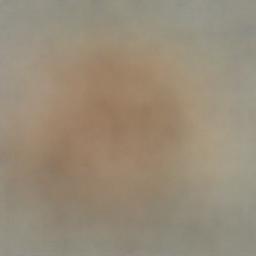

 40%|████      | 10/25 [00:04<00:06,  2.32it/s]

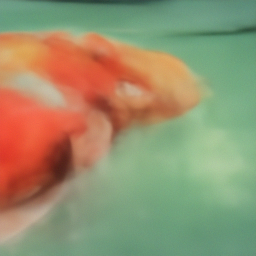

 80%|████████  | 20/25 [00:08<00:02,  2.32it/s]

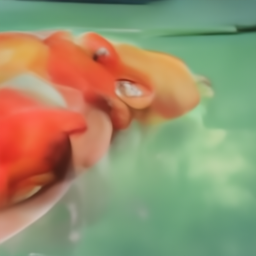

100%|██████████| 25/25 [00:10<00:00,  2.29it/s]


Generating video...


  0%|          | 0/25 [00:00<?, ?it/s]

The video is now being compressed, wait ...
The video is ready


  0%|          | 0/25 [00:00<?, ?it/s]

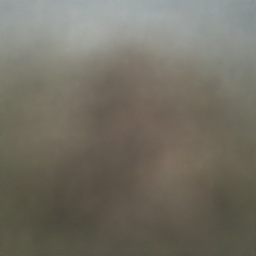

 40%|████      | 10/25 [00:04<00:06,  2.31it/s]

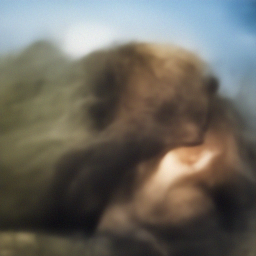

 80%|████████  | 20/25 [00:08<00:02,  2.32it/s]

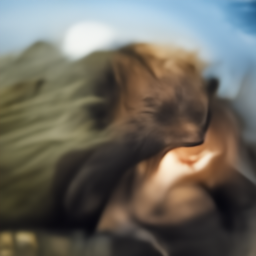

100%|██████████| 25/25 [00:10<00:00,  2.29it/s]


Generating video...


  0%|          | 0/25 [00:00<?, ?it/s]

The video is now being compressed, wait ...
The video is ready


  0%|          | 0/25 [00:00<?, ?it/s]

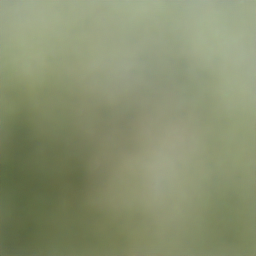

 40%|████      | 10/25 [00:04<00:06,  2.31it/s]

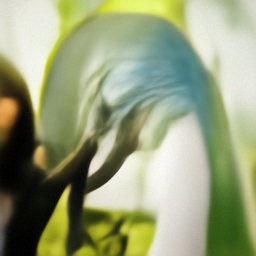

 80%|████████  | 20/25 [00:08<00:02,  2.32it/s]

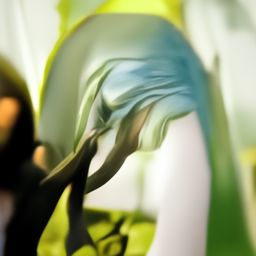

100%|██████████| 25/25 [00:10<00:00,  2.29it/s]


Generating video...


  0%|          | 0/25 [00:00<?, ?it/s]

The video is now being compressed, wait ...
The video is ready


  0%|          | 0/25 [00:00<?, ?it/s]

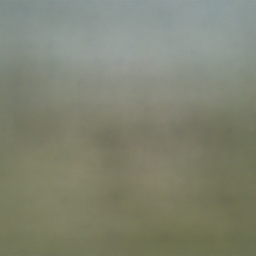

 40%|████      | 10/25 [00:04<00:06,  2.31it/s]

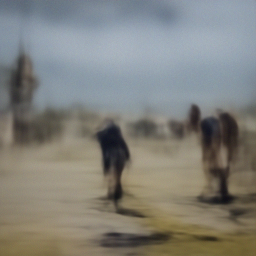

 80%|████████  | 20/25 [00:08<00:02,  2.32it/s]

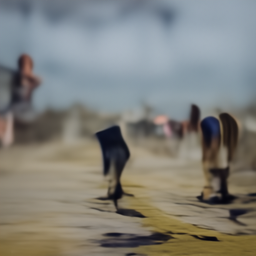

100%|██████████| 25/25 [00:10<00:00,  2.28it/s]


Generating video...


  0%|          | 0/25 [00:00<?, ?it/s]

The video is now being compressed, wait ...
The video is ready


  0%|          | 0/25 [00:00<?, ?it/s]

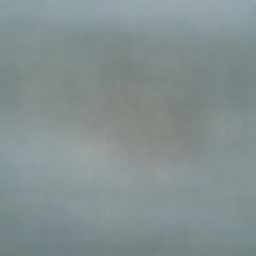

 40%|████      | 10/25 [00:04<00:06,  2.31it/s]

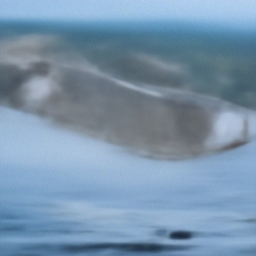

 80%|████████  | 20/25 [00:08<00:02,  2.32it/s]

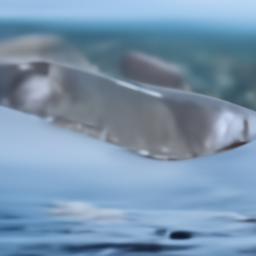

100%|██████████| 25/25 [00:10<00:00,  2.29it/s]


Generating video...


  0%|          | 0/25 [00:00<?, ?it/s]

The video is now being compressed, wait ...
The video is ready


  0%|          | 0/25 [00:00<?, ?it/s]

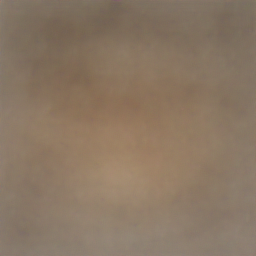

 36%|███▌      | 9/25 [00:04<00:07,  2.06it/s]


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
from einops import rearrange


@torch.no_grad()
def sample(model, x, steps, eta, extra_args):
    """Draws samples from a model given starting noise."""
    ts = x.new_ones([x.shape[0]])

    images = []

    # Create the noise schedule
    alphas, sigmas = utils.t_to_alpha_sigma(steps)

    # The sampling loop
    for i in trange(len(steps)):

        # Get the model output (v, the predicted velocity)
        with torch.cuda.amp.autocast():
            v = model(x, ts * steps[i], **extra_args).float()

        # Predict the noise and the denoised image
        pred = x * alphas[i] - v * sigmas[i]
        eps = x * sigmas[i] + v * alphas[i]

        image_bytes = ((pred[0] * 0.5 + 0.5) * 255).clamp(0, 255)
        image_bytes = image_bytes.cpu().detach().numpy().astype(np.uint8)
        image_bytes = rearrange(image_bytes, 'c w h -> w h c')
        images.append(image_bytes)
  
        if i % 10 == 0:
            image = Image.fromarray(image_bytes)
            display.display(image)

        # If we are not on the last timestep, compute the noisy image for the
        # next timestep.
        if i < len(steps) - 1:
            # If eta > 0, adjust the scaling factor for the predicted noise
            # downward according to the amount of additional noise to add
            ddim_sigma = eta * (sigmas[i + 1]**2 / sigmas[i]**2).sqrt() * \
                (1 - alphas[i]**2 / alphas[i + 1]**2).sqrt()
            adjusted_sigma = (sigmas[i + 1]**2 - ddim_sigma**2).sqrt()

            # Recombine the predicted noise and predicted denoised image in the
            # correct proportions for the next step
            x = pred * alphas[i + 1] + eps * adjusted_sigma

            # Add the correct amount of fresh noise
            if eta:
                x += torch.randn_like(x) * ddim_sigma

    # If we are on the last timestep, output the denoised image
    return pred, images

@torch.no_grad()
def cond_sample(model, x, steps, eta, extra_args, cond_fn):
    """Draws guided samples from a model given starting noise."""
    ts = x.new_ones([x.shape[0]])

    # Create the noise schedule
    alphas, sigmas = utils.t_to_alpha_sigma(steps)
    images = []

    # The sampling loop
    for i in trange(len(steps)):

        # Get the model output
        with torch.enable_grad():
            x = x.detach().requires_grad_()
            with torch.cuda.amp.autocast():
                v = model(x, ts * steps[i], **extra_args)

            if steps[i] < 1:
                pred = x * alphas[i] - v * sigmas[i]
                cond_grad = cond_fn(x, ts * steps[i], pred, **extra_args).detach()
                v = v.detach() - cond_grad * (sigmas[i] / alphas[i])
            else:
                v = v.detach()

        # Predict the noise and the denoised image
        pred = x * alphas[i] - v * sigmas[i]
        eps = x * sigmas[i] + v * alphas[i]

        image_bytes = ((pred[0] * 0.5 + 0.5) * 255).clamp(0, 255)
        image_bytes = image_bytes.cpu().detach().numpy().astype(np.uint8)
        image_bytes = rearrange(image_bytes, 'c w h -> w h c')
        images.append(image_bytes)
  
        if i % 10 == 0:
            image = Image.fromarray(image_bytes)
            display.display(image)

        # If we are not on the last timestep, compute the noisy image for the
        # next timestep.
        if i < len(steps) - 1:
            # If eta > 0, adjust the scaling factor for the predicted noise
            # downward according to the amount of additional noise to add
            ddim_sigma = eta * (sigmas[i + 1]**2 / sigmas[i]**2).sqrt() * \
                (1 - alphas[i]**2 / alphas[i + 1]**2).sqrt()
            adjusted_sigma = (sigmas[i + 1]**2 - ddim_sigma**2).sqrt()

            # Recombine the predicted noise and predicted denoised image in the
            # correct proportions for the next step
            x = pred * alphas[i + 1] + eps * adjusted_sigma

            # Add the correct amount of fresh noise
            if eta:
                x += torch.randn_like(x) * ddim_sigma

    # If we are on the last timestep, output the denoised image
    return pred, images

def crowson_distance(x, y):
    x = F.normalize(x, dim=-1)
    y = F.normalize(y, dim=-1)
    return torch.arcsin((x - y).norm(dim=-1) / 2).pow(2) * 2.


class EmbeddingLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x, y, t):
        loss = torch.stack([
            ((x[f'transformer.resblocks.{i}'] - y[f'transformer.resblocks.{i}']) ** 2).mean()
            for i in range(12)
        ]).mean()

        #i = int((1 - t) * 13)
        #if i <= 11:
        i = 0
        loss = ((x[f'transformer.resblocks.{i}'] - y[f'transformer.resblocks.{i}']) ** 2).mean() * 100
        #else:
        loss = loss + crowson_distance(x['embedding'], y['embedding']).mean()

        #loss = loss * x[f'embedding'].shape[0]
        
        return loss

iteration = 0
criterion = EmbeddingLoss()
clip_guidance_scale = 0

def cond_fn(x, t, pred, clip_embed):
    #clip_in = normalize(make_cutouts((pred + 1) / 2))
    clip_in = normalize(F.adaptive_avg_pool2d(pred * 0.5 + 0.5, (224, 224)))
    image_embeds = clip_model.encode_image(clip_in).view([cutn, x.shape[0], -1])
    loss = criterion(stimulus_embeddings, embeddings, t)
    loss = loss * clip_guidance_scale
    grad = -torch.autograd.grad(loss, x)[0]
    return grad

def run(x, steps, clip_embed):
    eta = 0
    iteration = 0
    if hasattr(model, 'clip_model'):
        extra_args = {'clip_embed': clip_embed}
        cond_fn_ = cond_fn
    else:
        extra_args = {}
        cond_fn_ = partial(cond_fn, clip_embed=clip_embed)
    if not clip_guidance_scale:
        return sample(model, x, steps, eta, extra_args)
    return cond_sample(model, x, steps, eta, extra_args, cond_fn_)

run_id = hex(np.random.randint(2 ** 32)).split('x')[1]

gc.collect()
torch.cuda.empty_cache()

for i, stimulus_batch in enumerate(np.split(np.array(stimulus_ids), 50)):
    image_data = [stimulus_images[stimulus_id]['data'][:]
                  for stimulus_id in stimulus_batch]
    image_data = [Image.fromarray(image) for image in image_data]
    x = torch.stack([preprocess(image).to(torch.float16) 
                    for image in image_data]).to(device)
    with torch.no_grad():
        clip_model.visual(x).float()
    stimulus_embeddings = {
        module_name: tensor.clone()
        for module_name, tensor in embeddings.items()
    }
    #for k, v, in stimulus_embeddings.items():
    #    v.requires_grad = True
    
    torch.manual_seed(0xDEADBEEF + i+ 100)
    max_iterations = 25
    x = torch.randn([1, 3, side_y, side_x], device=device)
    t = torch.linspace(1, 0, max_iterations + 1, device=device)[:-1]
    steps = utils.get_spliced_ddpm_cosine_schedule(t)
    pred, images = run(x, steps, stimulus_embeddings['embedding'])

    run_name = 'samples'
    results_path = root / 'optimization_results' / model_name
    results_path = results_path / run_name / run_id

    stim_video_path = results_path / 'videos'
    stim_image_path = results_path / 'images'
    stim_video_path.mkdir(exist_ok=True, parents=True)
    stim_image_path.mkdir(exist_ok=True, parents=True)

    #for image_bytes in tqdm(images):
    #    imageio.imwrite('/content/steps/' + str(i) + '.png', np.array(image_bytes))

    for i, image_id in enumerate(stimulus_batch):
        file_name = f'image-{image_id}'
        video_path = str(stim_video_path / f'{file_name}.mp4')
        image_path = str(stim_image_path / f'{file_name}.png')
        create_video(images, video_path)
        imageio.imwrite(image_path, images[-1])